In [22]:
from exp.expdata import GenExAdapter
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

from exp.evaluate.jsindy import evaluate_jmodel

In [2]:
noise = 0.1
dt_train = 2.0
t1=100.

expdata = GenExAdapter(system="vdp", t0=0., t1=t1, noise=noise, n_train=50, n_colloc=500, seed=1234)

In [3]:
x_true = expdata.x_true
t_true = expdata.t_true

t_train = expdata.t_train
x_train = expdata.x_train
t_train.shape

(50,)

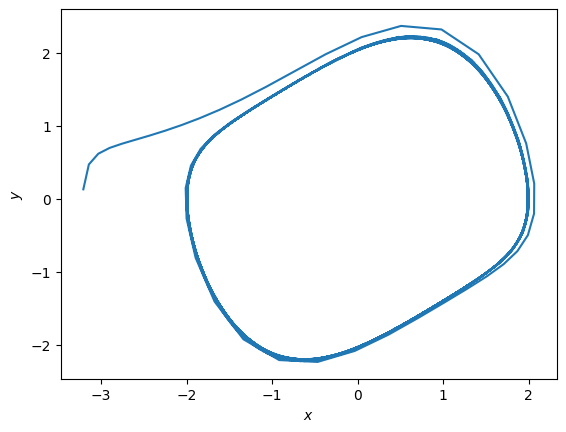

In [4]:
plt.plot(x_true[:,0], x_true[:,1])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [5]:
t_train[-1]+dt_train, t_train

(Array(100., dtype=float64),
 Array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
        52., 54., 56., 58., 60., 62., 64., 66., 68., 70., 72., 74., 76.,
        78., 80., 82., 84., 86., 88., 90., 92., 94., 96., 98.],      dtype=float64))

In [6]:
x_train.shape

(50, 2)

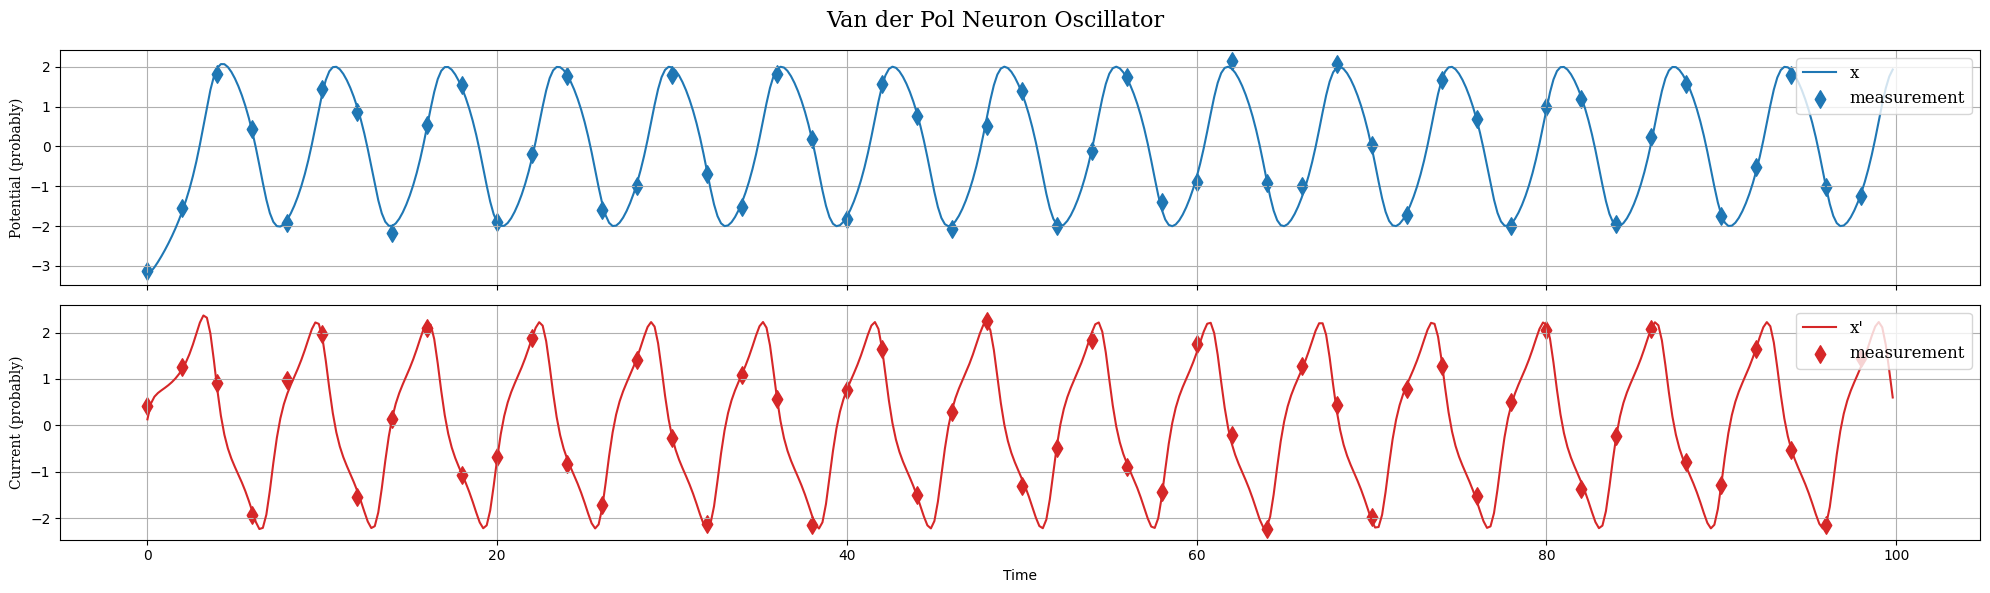

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,6), sharex=True)

fontname = 'serif'

ax1.plot(t_true, x_true[:,0], label="x", c='tab:blue',)
ax1.scatter(t_train, x_train[:,0], label="measurement", marker='d',s=80)
ax1.set_ylabel("Potential (probably)", fontname=fontname)
ax1.legend(loc='upper right',prop={'family': fontname, 'size':12})
ax1.grid(True)

ax2.plot(t_true, x_true[:,1], label='x\'', c='tab:red')
ax2.scatter(t_train, x_train[:,1], label="measurement", c='tab:red', marker='d',s=80)
ax2.set_ylabel("Current (probably)", fontname=fontname)
ax2.set_xlabel("Time")
ax2.grid(True)
ax2.legend(loc='upper right',prop={'family': fontname, 'size':12})

plt.suptitle("Van der Pol Neuron Oscillator", fontsize=16, fontname=fontname)
plt.tight_layout()
plt.show()

$$\dot x = \alpha x - \beta x y$$
$$\dot y = -\gamma y + \delta x y $$

where $\alpha = 1.1$, $\beta = 0.4$, $\gamma  = 0.4$, and $\delta = 0.1$.

In [6]:
expdata.feature_names

['x', "x'"]

In [7]:
X = x_true[:,0]
t = t_true
dt = t[1]-t[0]

In [8]:
Y = fft(X-np.mean(X))
Y_real = np.real(Y)
Y_imag = np.imag(Y)
freqs = fftfreq(len(t),dt)
pos_mask = freqs > 0
power = np.abs(Y[pos_mask])**2

In [9]:
peaks, _ = find_peaks(power)

In [10]:
power[peaks]

array([1.71071728e+05, 1.39931109e+03, 5.90910108e+01, 2.87834604e+01,
       1.82626411e+01, 1.66194418e+01, 1.13693320e+01])

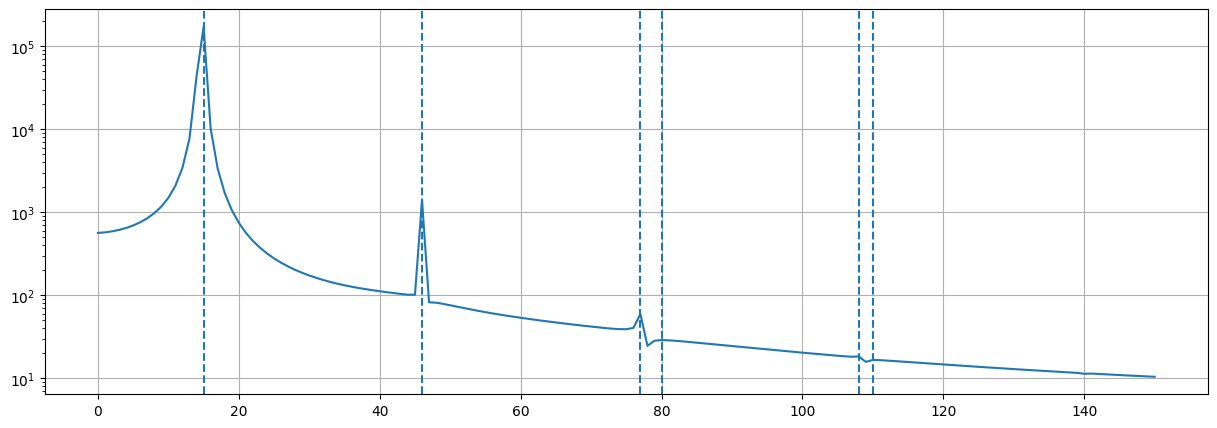

In [11]:
cutoff = -1
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(power[:peaks[cutoff]+10])
for peak in peaks[:cutoff]: 
    ax.axvline(peak, linestyle='--')
ax.grid(True)
ax.set_yscale('log')
plt.show()
# sampling slightly les than half the period

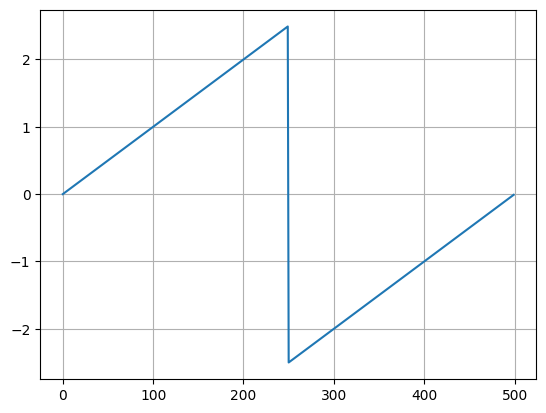

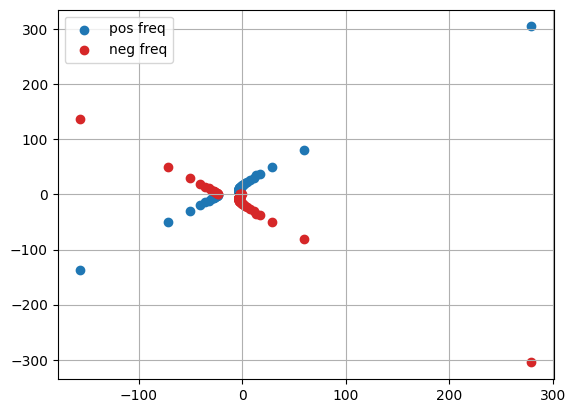

In [12]:
plt.plot(freqs)
plt.grid(True)
plt.show()
plt.scatter(Y_real[pos_mask],Y_imag[pos_mask],c='tab:blue', label='pos freq')
plt.scatter(Y_real[~pos_mask],Y_imag[~pos_mask],c='tab:red', label = 'neg freq')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

def get_nyquist_info(x, t, trim_start=0):
    # Trim initial time if needed
    mask = t > trim_start
    x = x[mask]
    t = t[mask]

    Y = fft(x - np.mean(x))
    dt = t[1] - t[0]
    freqs = fftfreq(len(t), dt)

    pos_mask = freqs > 0
    pos_freqs = freqs[pos_mask]
    power = np.abs(Y[pos_mask])**2

    f_max = pos_freqs[np.argmax(power)]
    nyquist_fs = 2 * f_max

    return f_max, nyquist_fs, power, pos_freqs


prey
Estimated dominant frequency: 0.160 Hz
Nyquist sampling frequency: 0.321 Hz
Sampling rate: 3.119 s
3.11875
predator
Estimated dominant frequency: 0.160 Hz
Nyquist sampling frequency: 0.321 Hz
Sampling rate: 3.119 s


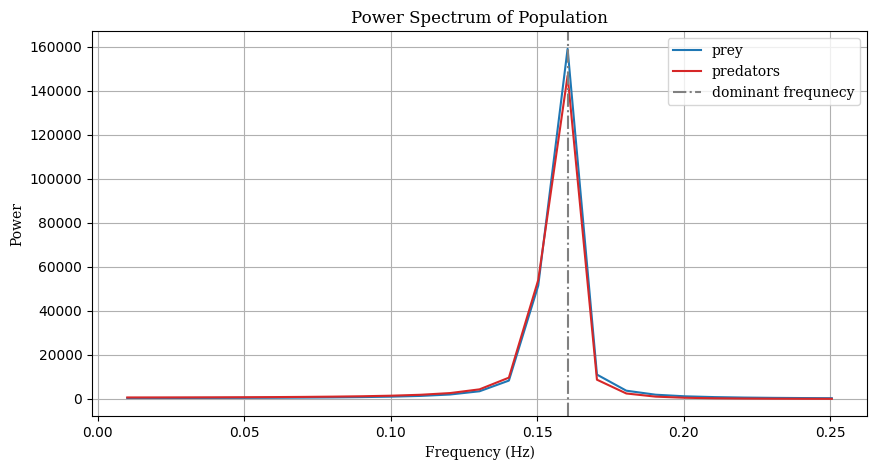

249


In [14]:

# Assuming `sol` from earlier
# prey = x_true[:,0]
# t = t_true
# dt = t[1] - t[0]


f_max, nyquist_fs,power, pos_freqs = get_nyquist_info(x_true[:,0],t_true)
f_max2, nyquist_fs2,power2, pos_freqs2 = get_nyquist_info(x_true[:,1],t_true)

print("prey")
print(f"Estimated dominant frequency: {f_max:.3f} Hz")
print(f"Nyquist sampling frequency: {nyquist_fs:.3f} Hz")
print(f"Sampling rate: {1/nyquist_fs:.3f} s")
print(1/nyquist_fs)

print('predator')
print(f"Estimated dominant frequency: {f_max2:.3f} Hz")
print(f"Nyquist sampling frequency: {nyquist_fs2:.3f} Hz")
print(f"Sampling rate: {1/nyquist_fs2:.3f} s")

# Optional: Plot spectrum
family = 'serif'

fig, ax1 = plt.subplots(1,1, figsize= (10,5))

tot = len(power)
tot=25
ax1.plot(pos_freqs[:tot], power[:tot], label='prey')
ax1.plot(pos_freqs2[:tot],power2[:tot], c='tab:red', label='predators')
ax1.axvline(f_max, linestyle='-.', c='grey', label='dominant frequnecy')
ax1.set_xlabel("Frequency (Hz)",family=family)
ax1.set_ylabel("Power", family=family)
ax1.set_title("Power Spectrum of Population", family=family)
ax1.legend(prop = {'family': family})
ax1.grid(True)


plt.show()
print(len(power))

# How is nyquist frequency changing over time

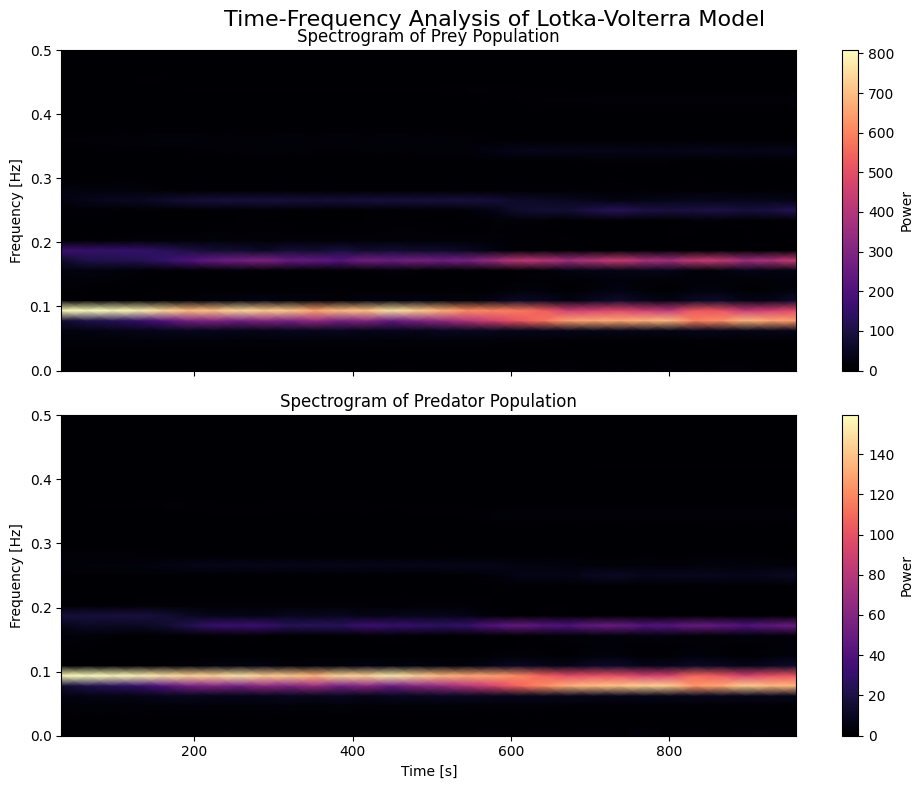

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import spectrogram

# Lotka-Volterra parameters
alpha, beta, gamma, delta = 1.1, 0.4, 0.4, 0.1

def lotka_volterra(t, z):
    x, y = z
    return [alpha * x - beta * x * y, delta * x * y - gamma * y]

# Simulate system
x0, y0 = 10, 5
t_end = 1000
t_eval = np.linspace(0, t_end, 4000)
sol = solve_ivp(lotka_volterra, [0, t_end], [x0, y0], t_eval=t_eval)

prey = sol.y[0]
pred = sol.y[1]
t = sol.t
dt = t[1] - t[0]
fs = 1 / dt

# Compute spectrograms
f_prey, t_prey, Sxx_prey = spectrogram(prey, fs=fs, nperseg=256, noverlap=128)
f_pred, t_pred, Sxx_pred = spectrogram(pred, fs=fs, nperseg=256, noverlap=128)

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

im1 = ax1.pcolormesh(t_prey, f_prey, Sxx_prey, shading='gouraud', cmap='magma')
ax1.set_ylabel('Frequency [Hz]')
ax1.set_title('Spectrogram of Prey Population')
ax1.set_ylim(0, 0.5)
fig.colorbar(im1, ax=ax1, label='Power')

im2 = ax2.pcolormesh(t_pred, f_pred, Sxx_pred, shading='gouraud', cmap='magma')
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [s]')
ax2.set_title('Spectrogram of Predator Population')
ax2.set_ylim(0, 0.5)
fig.colorbar(im2, ax=ax2, label='Power')

plt.tight_layout()
plt.suptitle('Time-Frequency Analysis of Lotka-Volterra Model', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()


# Learn Model

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import jax
jax.config.update('jax_enable_x64',True)

from jsindy.sindy_model import JSINDyModel
from jsindy.trajectory_model import CholDataAdaptedRKHSInterpolant, CholRKHSInterpolant
from jsindy.dynamics_model import FeatureLinearModel, PolyLib
from jsindy.optim import AlternatingActiveSetLMSolver, LMSettings, AnnealedAlternatingActiveSetLMSolver
from jsindy.optim.solvers.alt_active_set_lm_solver import pySindySparsifier
from pysindy import STLSQ
from jsindy.kernels import ConstantKernel, ScalarMaternKernel


In [19]:

kernel = (
    ConstantKernel(variance = 5.)
    +ScalarMaternKernel(p = 5,variance = 10., lengthscale=3,min_lengthscale=0.05)
)   
kernel=None

trajectory_model = CholDataAdaptedRKHSInterpolant(kernel=kernel)
dynamics_model = FeatureLinearModel(
    reg_scaling = 1.,
    feature_map=PolyLib(degree=3)
    
)
optsettings = LMSettings(
    max_iter = 2000,
    atol_gradnorm=1e-8,
    show_progress=True,
    no_tqdm=False,
    min_alpha = 1e-16,
    init_alpha = 5.,
)
data_weight = 20.
colloc_weight = 10. 
sparsifier = pySindySparsifier(STLSQ(threshold = 0.05,alpha = 0.01))
optimizer = AlternatingActiveSetLMSolver(
        beta_reg=1e-5,
        solver_settings=optsettings,
        fixed_colloc_weight=colloc_weight,
        fixed_data_weight=data_weight,
        sparsifier = sparsifier
        )

model = JSINDyModel(
    trajectory_model=trajectory_model,
    dynamics_model=dynamics_model,
    optimizer=optimizer,
    feature_names=['x','y']
)

In [20]:
model.fit(expdata.t_train, expdata.x_train, expdata.t_colloc)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

{'show_progress': True, 'sigma2_est': Array(0.03811197, dtype=float64), 'data_weight': 20.0, 'colloc_weight': 10.0}
Warm Start


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 38.76, gradnorm = 21.07, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 19.69, gradnorm = 12.3, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 9.94, gradnorm = 7.952, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 4.882, gradnorm = 5.207, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 2.283, gradnorm = 3.424, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.9949, gradnorm = 2.233, alpha = 1.674, improvement_ratio = 1.0
Iteration 173, loss = 0.0009651, gradnorm = 9.147e-09, alpha = 6.653e-06, improvement_ratio = 0.4506
Model after smooth warm start
(x)' = 0.018 1 + 0.258 x + 0.465 y + -0.019 x^2 + 0.007 x y + -0.017 y^2 + 0.021 x^3 + 0.521 x^2 y + -0.268 x y^2 + -0.300 y^3
(y)' = 0.016 1 + 0.048 x + 0.349 y + -0.068 x^2 + -0.034 x y + 0.002 y^2 + -0.161 x^3 + 0.165 x^2 y + 0.478 x y^2 + -0.241 y^3
Alternating Activeset Sparsifier
13 active coeffs changed
Active set stabilized


In [21]:
metrics = evaluate_jmodel_alt(model=model,expdata=expdata)
model.print()
metrics['xdot_metrics']

NameError: name 'evaluate_jmodel_alt' is not defined

In [ ]:
coeff_est

array([[ 0.        ,  0.71032425, -1.18636941,  0.        ,  0.        ,
         0.        ,  0.        ,  1.07718922, -0.62773372,  0.        ],
       [ 0.        ,  0.        , 17.75068051,  0.07496361,  0.        ,
         0.        , -0.45962788, -3.2894452 ,  2.18857864, -4.01077501]])

In [ ]:
metrics["coeff_metrics"]

In [ ]:
metrics["xdot_metrics"]

{'mse': Array(620.6738286, dtype=float64),
 'rmse': np.float64(24.91332632542275),
 'mae': np.float64(16.999146936356183),
 'max_abs_error': np.float64(78.50796665344052),
 'normalized_mse': Array(86.78635236, dtype=float64),
 'relative_l2_error': np.float64(9.31399678711958)}

In [ ]:
x_pred = model.predict_state(expdata.t_true)
x_true = expdata.x_true

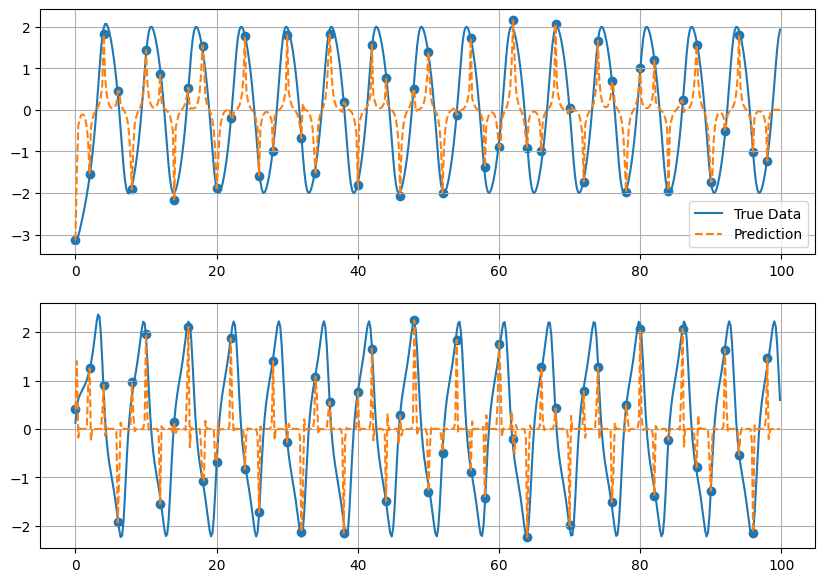

In [ ]:
# for i in range(len(pred_sim.T)):
#     plt.scatter(t_train, x_train[:,i])
#     plt.plot(t_true, x_true[:,i], label='true')
#     # plt.plot(t_true, true[:,i])
#     plt.plot(t_true, pred_sim[:,i], label='pred', linestyle='--')
#     plt.legend()
#     plt.show()

fig, ax = plt.subplots(2,1, figsize=(10,7))

for idx in range(2):
    ax[idx].scatter(t_train, x_train[:,idx])
    ax[idx].plot(t_true, x_true[:,idx], label='True Data')
    ax[idx].plot(t_true, x_pred[:,idx], label='Prediction',linestyle='--')
    ax[idx].grid(True)
    if idx==0:
        ax[idx].legend()


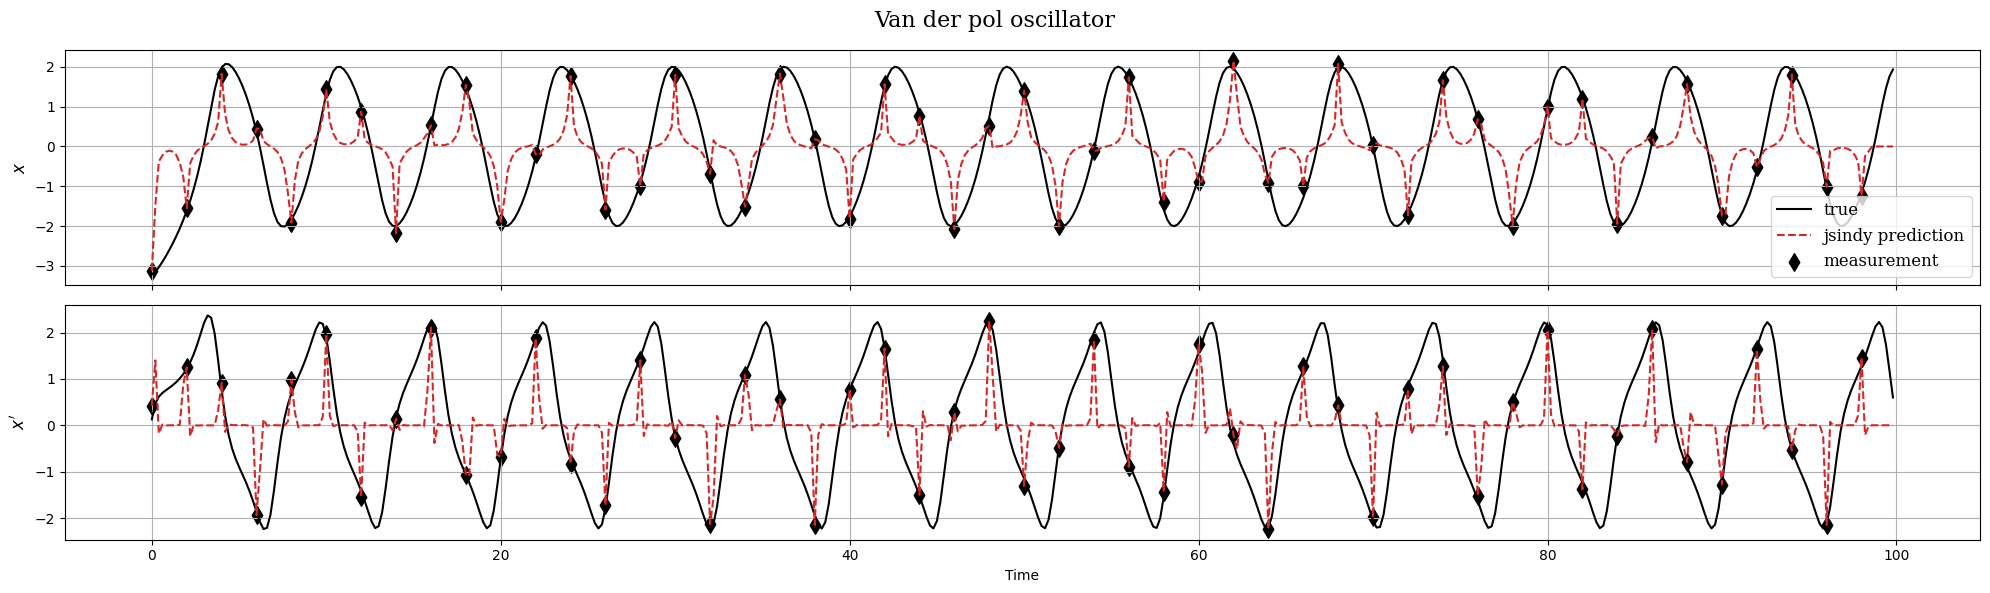

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,6), sharex=True)

fontname = 'serif'

ax1.plot(t_true, x_true[:,0], label="true", c='black',)
ax1.plot(t_true, x_pred[:,0], label='jsindy prediction',linestyle='--',c='tab:red')
ax1.scatter(t_train, x_train[:,0], label="measurement", marker='d',s=80,c='black')
ax1.set_ylabel(r"$x$", fontname=fontname,size=12)
ax1.legend(prop={'family': fontname, 'size':12})
ax1.grid(True)

ax2.plot(t_true, x_true[:,1], label='predator', c='black')
ax2.plot(t_true, x_pred[:,1], label='prediction', linestyle='--', c='tab:red')
ax2.scatter(t_train, x_train[:,1], label="measurement", c='black', marker='d',s=80)
ax2.set_ylabel(r"$x'$", fontname=fontname,size=12)
ax2.set_xlabel("Time")
ax2.grid(True)
# ax2.legend(prop={'family': fontname, 'size':12})

plt.suptitle("Van der pol oscillator", fontsize=16, fontname=fontname)
plt.tight_layout()
plt.show()

In [ ]:
xdot_pred = model.predict(expdata.x_true)
xdot_true = expdata.x_dot

AttributeError: 'GenExAdapter' object has no attribute 'x_dot'

In [ ]:
for i in range(len(xdot_pred.T)):
    plt.plot(t_true, xdot_true[:,i], label='true')
    plt.plot(t_true, xdot_pred[:,i], label='pred', linestyle='--')
    plt.legend()
    plt.show()

NameError: name 'xdot_true' is not defined

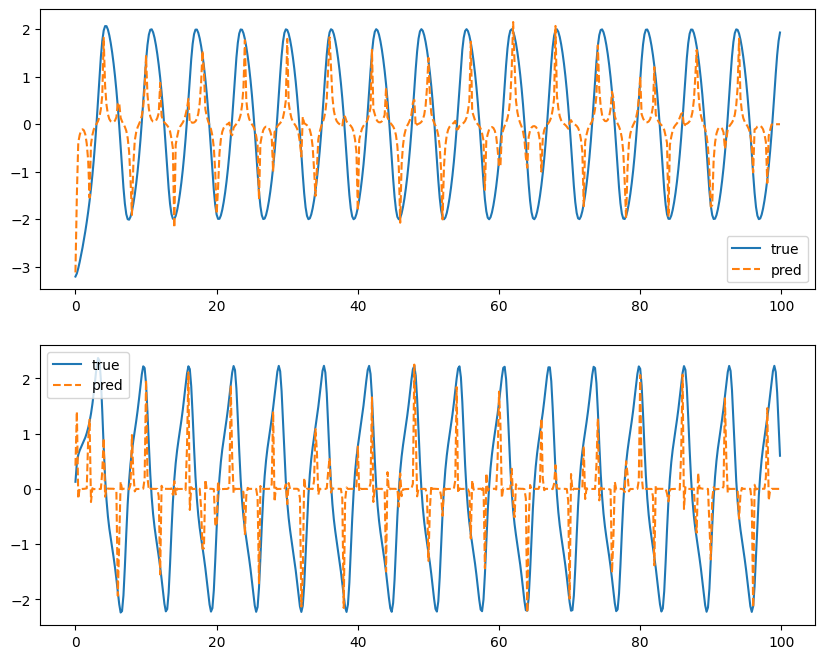

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,8))

for idx in range(2):
    # ax[idx].scatter(t_train, x_train[:,idx])
    ax[idx].plot(t_true, x_true[:,idx], label='true')
    # plt.plot(t_true, true[:,i])
    ax[idx].plot(t_true, x_pred[:,idx], label='pred', linestyle='--')
    ax[idx].legend()



In [ ]:
import jax
from equinox import tree_pprint
tree_pprint(model.traj_model.kernel, short_arrays=False)
k1 = model.traj_model.kernel.kernels[1]


SumKernel(
  kernels=(
    ConstantKernel(raw_variance=Array(-24.17145043, dtype=float64)),
    ScalarMaternKernel(
      core_matern=<function build_matern_core.<locals>.<lambda>>,
      p_order=5,
      raw_variance=Array(1.92694827, dtype=float64),
      raw_lengthscale=Array(-2.16737232, dtype=float64),
      min_lengthscale=0.01
    )
  )
)


In [ ]:
jax.nn.softplus(k1.raw_lengthscale) + k1.min_lengthscale


Array(0.11838616, dtype=float64)

# Try Annealed Optimizer

In [17]:

kernel = (
    ConstantKernel(variance = 5.)
    +ScalarMaternKernel(p = 5,variance = 10., lengthscale=3,min_lengthscale=0.05)
)   
kernel=None

trajectory_model = CholDataAdaptedRKHSInterpolant(kernel=kernel)
dynamics_model = FeatureLinearModel(
    reg_scaling = 1.,
    feature_map=PolyLib(degree=2)
    
)
optsettings = LMSettings(
    max_iter = 2000,
    atol_gradnorm=1e-8,
    show_progress=True,
    no_tqdm=False,
    min_alpha = 1e-16,
    init_alpha = 5.,
)
data_weight = 20.
colloc_weight = 10.
sparsifier = pySindySparsifier(STLSQ(threshold = 0.05,alpha = 0.01))
optimizer = AnnealedAlternatingActiveSetLMSolver(
        beta_reg=1e-5,
        solver_settings=optsettings,
        fixed_colloc_weight=colloc_weight,
        fixed_data_weight=data_weight,
        sparsifier = sparsifier,
        num_annealing_steps=4,
        )

model = JSINDyModel(
    trajectory_model=trajectory_model,
    dynamics_model=dynamics_model,
    optimizer=optimizer,
    feature_names=['x','y']
)

In [18]:
model.fit(expdata.t_train, expdata.x_train, expdata.t_colloc)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

{'show_progress': True, 'sigma2_est': Array(0.03811197, dtype=float64), 'data_weight': 20.0, 'colloc_weight': 10.0}
Solving for data_weight = 20.0, colloc_weight = 0.08 beta_reg = 8e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.6508, gradnorm = 9.432, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.632, gradnorm = 1.044, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 0.6249, gradnorm = 0.1833, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 0.6167, gradnorm = 0.1553, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 0.607, gradnorm = 0.1538, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.5957, gradnorm = 0.1522, alpha = 1.674, improvement_ratio = 1.0
Iteration 92, loss = 0.000971, gradnorm = 8.545e-09, alpha = 2.163e-07, improvement_ratio = 1.725
Solving for data_weight = 20.0, colloc_weight = 0.4 beta_reg = 4e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.0009726, gradnorm = 0.0005567, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.0009726, gradnorm = 0.0003779, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 0.0009726, gradnorm = 0.0003691, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 0.0009725, gradnorm = 0.000362, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 0.0009725, gradnorm = 0.0003538, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.0009724, gradnorm = 0.0003443, alpha = 1.674, improvement_ratio = 1.0
Iteration 34, loss = 0.0009713, gradnorm = 7.561e-09, alpha = 0.008465, improvement_ratio = 1.0
Solving for data_weight = 20.0, colloc_weight = 2.0 beta_reg = 2e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.0009716, gradnorm = 0.0005571, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.0009716, gradnorm = 0.0003569, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 0.0009716, gradnorm = 0.0003288, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 0.0009716, gradnorm = 0.0003023, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 0.0009715, gradnorm = 0.000275, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.0009715, gradnorm = 0.0002471, alpha = 1.674, improvement_ratio = 1.0
Iteration 25, loss = 0.0009714, gradnorm = 9.101e-09, alpha = 0.04368, improvement_ratio = 1.0
Solving for data_weight = 20.0, colloc_weight = 10.0 beta_reg = 1e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.0009714, gradnorm = 0.0005572, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.0009714, gradnorm = 0.0002847, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 0.0009714, gradnorm = 0.0002148, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 0.0009714, gradnorm = 0.0001608, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 0.0009714, gradnorm = 0.0001171, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.0009714, gradnorm = 8.231e-05, alpha = 1.674, improvement_ratio = 1.0
Iteration 17, loss = 0.0009714, gradnorm = 8.134e-09, alpha = 0.1878, improvement_ratio = 1.0
Model after smooth warm start
(x)' = -0.003 1 + 0.007 x + 0.103 y + 0.018 x^2 + -0.049 x y + 0.001 y^2
(y)' = 0.009 1 + -0.106 x + -0.036 y + -0.030 x^2 + -0.023 x y + 0.013 y^2
Alternating Activeset Sparsifier
4 active coeffs changed
Active set stabilized


Array(-2.16737232, dtype=float64)

In [25]:
metrics = evaluate_jmodel_alt(model=model,expdata=expdata)
model.print()
metrics['xdot_metrics']

(x)' = 0.104 y
(y)' = -0.100 x


{'mse': Array(1.86763026, dtype=float64),
 'rmse': np.float64(1.3666126974308443),
 'mae': np.float64(1.1921908800433407),
 'max_abs_error': np.float64(3.0448284070451255),
 'normalized_mse': Array(0.82776301, dtype=float64),
 'relative_l2_error': np.float64(0.9096511009947389)}

In [26]:
expdata.print()
x_pred = model.predict_state(expdata.t_true)
x_true = expdata.x_true

x' = 1 x'
x'' = -1 x + 0.5 x' + -0.5 x^2 x'


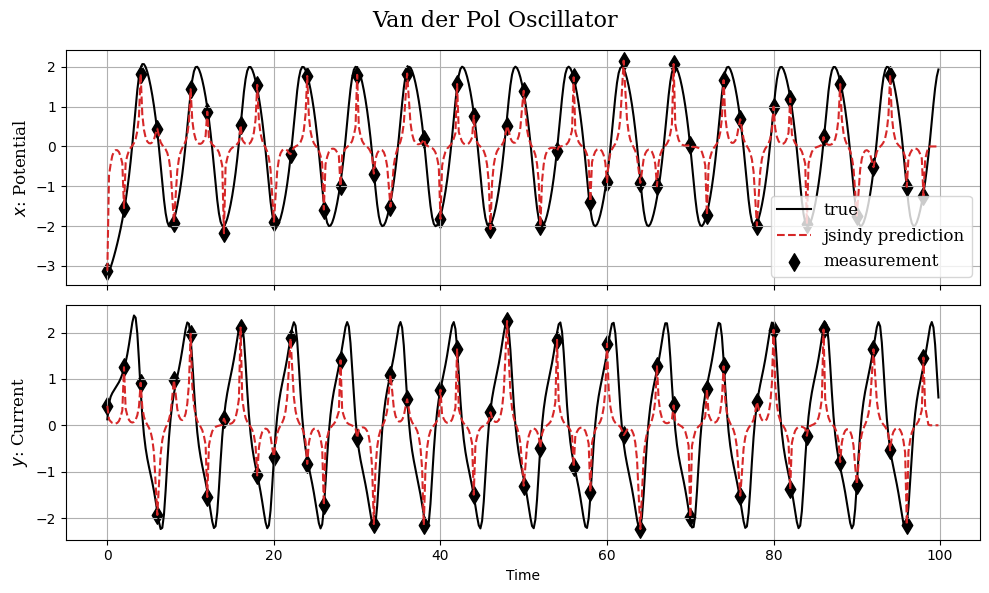

In [27]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6), sharex=True)

fontname = 'serif'

ax1.plot(t_true, x_true[:,0], label="true", c='black',)
ax1.plot(t_true, x_pred[:,0], label='jsindy prediction',linestyle='--',c='tab:red')
ax1.scatter(t_train, x_train[:,0], label="measurement", marker='d',s=80,c='black')
ax1.set_ylabel(r"$x$: Potential", fontname=fontname,size=12)
ax1.legend(prop={'family': fontname, 'size':12})
ax1.grid(True)

ax2.plot(t_true, x_true[:,1], label='predator', c='black')
ax2.plot(t_true, x_pred[:,1], label='prediction', linestyle='--', c='tab:red')
ax2.scatter(t_train, x_train[:,1], label="measurement", c='black', marker='d',s=80)
ax2.set_ylabel(r"$y$: Current", fontname=fontname,size=12)
ax2.set_xlabel("Time")
ax2.grid(True)
# ax2.legend(prop={'family': fontname, 'size':12})

plt.suptitle("Van der Pol Oscillator", fontsize=16, fontname=fontname)
plt.tight_layout()
plt.show()

## Let jsindy handle 2nd order

In [102]:
kernel = (
    ConstantKernel(variance = 5.)
    +ScalarMaternKernel(p = 5,variance = 10., lengthscale=3,min_lengthscale=2.0)
)   
kernel=None

trajectory_model = CholDataAdaptedRKHSInterpolant(kernel=kernel)
dynamics_model = FeatureLinearModel(
    reg_scaling = 1.,
    feature_map=PolyLib(degree=2)
    
)
optsettings = LMSettings(
    max_iter = 2000,
    atol_gradnorm=1e-8,
    show_progress=True,
    no_tqdm=False,
    min_alpha = 1e-16,
    init_alpha = 5.,
)
data_weight = 20.
colloc_weight = 10.
sparsifier = pySindySparsifier(STLSQ(threshold = 0.05,alpha = 0.01))
optimizer = AnnealedAlternatingActiveSetLMSolver(
        beta_reg=1e-5,
        solver_settings=optsettings,
        fixed_colloc_weight=colloc_weight,
        fixed_data_weight=data_weight,
        sparsifier = sparsifier,
        num_annealing_steps=4,
        )

model = JSINDyModel(
    trajectory_model=trajectory_model,
    dynamics_model=dynamics_model,
    optimizer=optimizer,
    input_orders=(0, 1),
    ode_order=2,
    feature_names=['x']
)

In [118]:
from importlib import reload
import jsindy.optim.optimizers
reload(jsindy.optim.optimizers)
from jsindy.optim.optimizers import AnnealedAlternatingActiveSetLMSolver

In [103]:
model.fit(expdata.t_train, expdata.x_train[:, :1], expdata.t_colloc)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

{'show_progress': True, 'sigma2_est': Array(0.03882224, dtype=float64), 'data_weight': 20.0, 'colloc_weight': 10.0}
Solving for data_weight = 20.0, colloc_weight = 0.08 beta_reg = 8e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 5.97, gradnorm = 10.78, alpha = 4.167, improvement_ratio = 1.008
Iteration 1, loss = 3.055, gradnorm = 5.558, alpha = 3.472, improvement_ratio = 1.005
Iteration 2, loss = 1.931, gradnorm = 2.988, alpha = 2.894, improvement_ratio = 1.001
Iteration 3, loss = 1.376, gradnorm = 1.742, alpha = 2.411, improvement_ratio = 0.9983
Iteration 4, loss = 1.02, gradnorm = 1.166, alpha = 2.009, improvement_ratio = 0.9969
Iteration 5, loss = 0.753, gradnorm = 0.8787, alpha = 1.674, improvement_ratio = 0.9964
Iteration 138, loss = 0.0003597, gradnorm = 9.324e-09, alpha = 1.89e-09, improvement_ratio = 1.871
Solving for data_weight = 20.0, colloc_weight = 0.4 beta_reg = 4e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.0003597, gradnorm = 0.0002198, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.0003597, gradnorm = 9.283e-05, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 0.0003597, gradnorm = 7.018e-05, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 0.0003597, gradnorm = 5.918e-05, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 0.0003597, gradnorm = 5.143e-05, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.0003597, gradnorm = 4.501e-05, alpha = 1.674, improvement_ratio = 1.0
Iteration 34, loss = 0.0003597, gradnorm = 5.901e-09, alpha = 0.008465, improvement_ratio = 1.0
Solving for data_weight = 20.0, colloc_weight = 2.0 beta_reg = 2e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.0003597, gradnorm = 0.0002198, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.0003597, gradnorm = 5.83e-05, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 0.0003597, gradnorm = 3.988e-05, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 0.0003597, gradnorm = 2.965e-05, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 0.0003597, gradnorm = 2.291e-05, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.0003597, gradnorm = 1.848e-05, alpha = 1.674, improvement_ratio = 1.0
Iteration 25, loss = 0.0003597, gradnorm = 7.632e-09, alpha = 0.04368, improvement_ratio = 1.0
Solving for data_weight = 20.0, colloc_weight = 10.0 beta_reg = 1e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.0003597, gradnorm = 0.0002198, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.0003597, gradnorm = 3.045e-05, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 0.0003597, gradnorm = 1.657e-05, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 0.0003597, gradnorm = 1.163e-05, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 0.0003597, gradnorm = 8.842e-06, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.0003597, gradnorm = 6.738e-06, alpha = 1.674, improvement_ratio = 1.0
Iteration 17, loss = 0.0003597, gradnorm = 5.237e-09, alpha = 0.1878, improvement_ratio = 1.0
Model after smooth warm start
(x)'' = -0.663 1 + -0.931 x + -0.025 (x') + -0.034 x^2 + 0.165 x (x') + 0.077 (x')^2
Alternating Activeset Sparsifier
2 active coeffs changed
2 active coeffs changed
Active set stabilized


In [104]:
model.print()

(x)'' = -7.072 x + 0.120 x (x')


In [92]:
expdata.print()

x' = 1 x'
x'' = -1 x + 0.5 x' + -0.5 x^2 x'


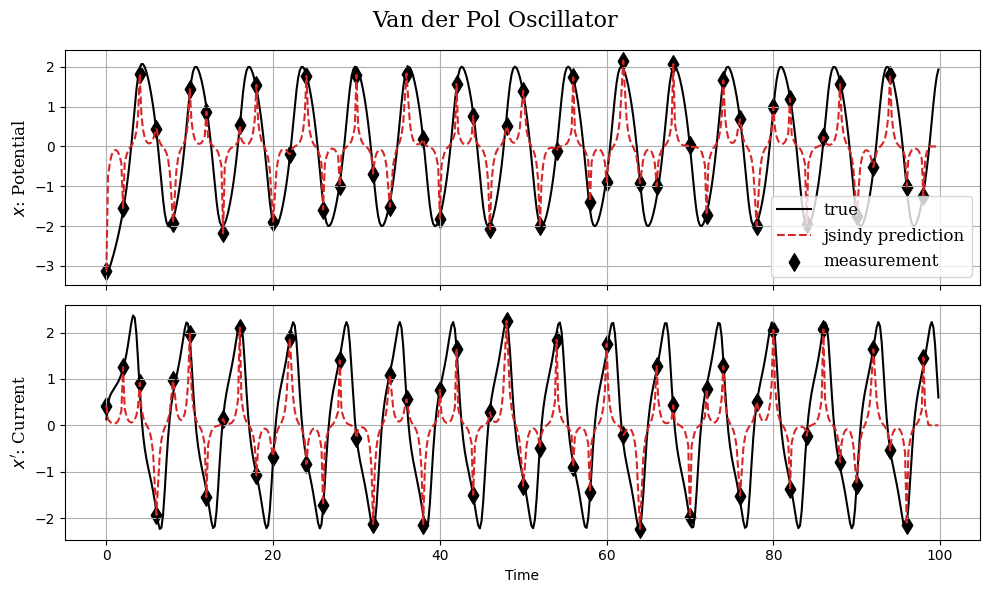

In [105]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6), sharex=True)

fontname = 'serif'

ax1.plot(t_true, x_true[:,0], label="true", c='black',)
ax1.plot(t_true, x_pred[:,0], label='jsindy prediction',linestyle='--',c='tab:red')
ax1.scatter(t_train, x_train[:,0], label="measurement", marker='d',s=80,c='black')
ax1.set_ylabel(r"$x$: Potential", fontname=fontname,size=12)
ax1.legend(prop={'family': fontname, 'size':12})
ax1.grid(True)

ax2.plot(t_true, x_true[:,1], label='predator', c='black')
ax2.plot(t_true, x_pred[:,1], label='prediction', linestyle='--', c='tab:red')
ax2.scatter(t_train, x_train[:,1], label="measurement", c='black', marker='d',s=80)
ax2.set_ylabel(r"$x'$: Current", fontname=fontname,size=12)
ax2.set_xlabel("Time")
ax2.grid(True)
# ax2.legend(prop={'family': fontname, 'size':12})

plt.suptitle("Van der Pol Oscillator", fontsize=16, fontname=fontname)
plt.tight_layout()
plt.show()

## Eschewing fitted kernel; use hand-tuned

In [125]:
kernel = (
    ConstantKernel(variance = 5.)
    +ScalarMaternKernel(p = 5,variance = 10., lengthscale=10)
)   
kernel=None

trajectory_model = CholRKHSInterpolant(kernel=kernel)
dynamics_model = FeatureLinearModel(
    reg_scaling = 1.,
    feature_map=PolyLib(degree=2)
    
)
optsettings = LMSettings(
    max_iter = 2000,
    atol_gradnorm=1e-8,
    show_progress=True,
    no_tqdm=False,
    min_alpha = 1e-16,
    init_alpha = 5.,
)
data_weight = 20.
colloc_weight = 10.
sparsifier = pySindySparsifier(STLSQ(threshold = 0.05,alpha = 0.01))
optimizer = AnnealedAlternatingActiveSetLMSolver(
        beta_reg=1e-5,
        solver_settings=optsettings,
        fixed_colloc_weight=colloc_weight,
        fixed_data_weight=data_weight,
        sparsifier = sparsifier,
        num_annealing_steps=4,
        )

model = JSINDyModel(
    trajectory_model=trajectory_model,
    dynamics_model=dynamics_model,
    optimizer=optimizer,
    input_orders=(0, 1),
    ode_order=2,
    feature_names=['x']
)

In [126]:
model.fit(expdata.t_train, expdata.x_train[:, :1], expdata.t_colloc)

{'show_progress': True, 'sigma2_est': None, 'data_weight': 20.0, 'colloc_weight': 10.0}
Solving for data_weight = 20.0, colloc_weight = 0.08 beta_reg = 8e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.03208, gradnorm = 0.6766, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.03172, gradnorm = 0.04273, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 0.0313, gradnorm = 0.03846, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 0.0308, gradnorm = 0.03818, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 0.03022, gradnorm = 0.03786, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.02953, gradnorm = 0.03747, alpha = 1.674, improvement_ratio = 1.0
Iteration 75, loss = 0.0009028, gradnorm = 8.414e-09, alpha = 4.799e-06, improvement_ratio = 1.002
Solving for data_weight = 20.0, colloc_weight = 0.4 beta_reg = 4e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.004178, gradnorm = 0.0267, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.004178, gradnorm = 0.0006975, alpha = 3.472, improvement_ratio = 1.0
Iteration 2, loss = 0.004178, gradnorm = 8.32e-05, alpha = 2.894, improvement_ratio = 1.0
Iteration 3, loss = 0.004178, gradnorm = 7.788e-05, alpha = 2.411, improvement_ratio = 1.0
Iteration 4, loss = 0.004178, gradnorm = 7.456e-05, alpha = 2.009, improvement_ratio = 1.0
Iteration 5, loss = 0.004178, gradnorm = 7.146e-05, alpha = 1.674, improvement_ratio = 1.0
Line Search Failed!
Final Iteration Results
Iteration 79, loss = 0.004173, gradnorm = 2.644e-08, alpha = 10.92, improvement_ratio = -2.588e+04
Solving for data_weight = 20.0, colloc_weight = 2.0 beta_reg = 2e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.02045, gradnorm = 0.1339, alpha = 4.167, improvement_ratio = 1.0
Iteration 1, loss = 0.02045, gradnorm = 0.003466, alpha = 3.472, improvement_ratio = 1.002
Iteration 2, loss = 0.02045, gradnorm = 0.000182, alpha = 2.894, improvement_ratio = 0.9995
Iteration 3, loss = 0.02045, gradnorm = 0.0001425, alpha = 2.411, improvement_ratio = 0.999
Iteration 4, loss = 0.02045, gradnorm = 0.000133, alpha = 2.009, improvement_ratio = 0.9989
Iteration 5, loss = 0.02045, gradnorm = 0.0001259, alpha = 1.674, improvement_ratio = 0.9984
Line Search Failed!
Final Iteration Results
Iteration 80, loss = 0.02035, gradnorm = 3.294e-07, alpha = 0.009236, improvement_ratio = -114.0
Solving for data_weight = 20.0, colloc_weight = 10.0 beta_reg = 1e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

Iteration 0, loss = 0.0994, gradnorm = 0.6663, alpha = 4.167, improvement_ratio = 0.9999
Iteration 1, loss = 0.0994, gradnorm = 0.01743, alpha = 3.472, improvement_ratio = 1.004
Iteration 2, loss = 0.0994, gradnorm = 0.002063, alpha = 2.894, improvement_ratio = 0.9903
Iteration 3, loss = 0.09939, gradnorm = 0.001699, alpha = 2.411, improvement_ratio = 0.9873
Iteration 4, loss = 0.09939, gradnorm = 0.00153, alpha = 2.009, improvement_ratio = 0.985
Iteration 5, loss = 0.09939, gradnorm = 0.001395, alpha = 1.674, improvement_ratio = 0.9834
Line Search Failed!
Final Iteration Results
Iteration 88, loss = 0.09709, gradnorm = 1.286e-07, alpha = 1.39e+03, improvement_ratio = -7.992e+05
Model after smooth warm start
(x)'' = 0.915 1 + -1.014 x + 0.019 (x') + -0.177 x^2 + -0.044 x (x') + -0.288 (x')^2
Alternating Activeset Sparsifier
Line search Failed
2 active coeffs changed
Line search Failed
Active set stabilized
Line search Failed


In [127]:
model.print()

(x)'' = 0.805 1 + -1.004 x + -0.154 x^2 + -0.258 (x')^2


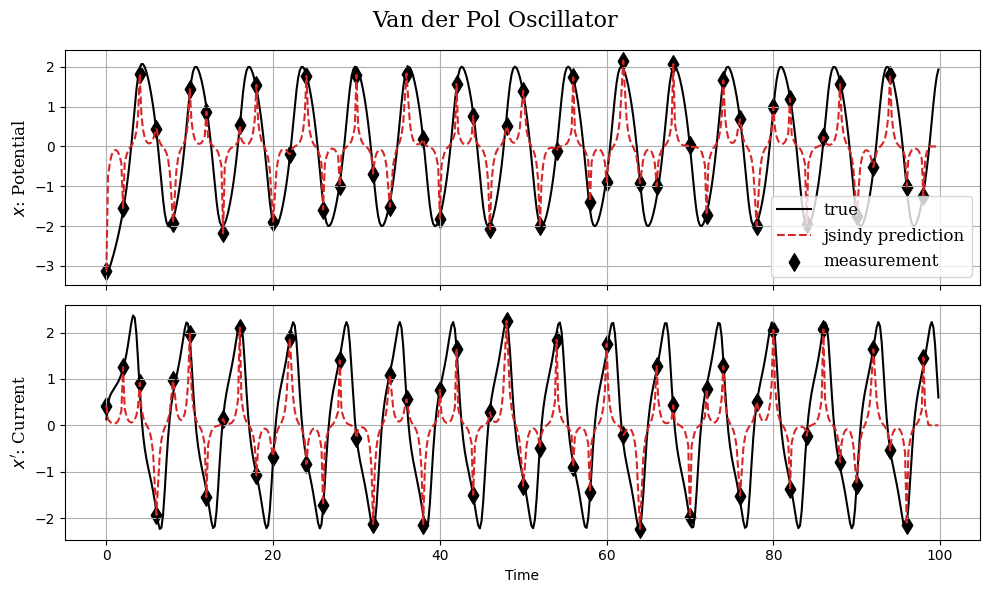

In [128]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,6), sharex=True)

fontname = 'serif'

ax1.plot(t_true, x_true[:,0], label="true", c='black',)
ax1.plot(t_true, x_pred[:,0], label='jsindy prediction',linestyle='--',c='tab:red')
ax1.scatter(t_train, x_train[:,0], label="measurement", marker='d',s=80,c='black')
ax1.set_ylabel(r"$x$: Potential", fontname=fontname,size=12)
ax1.legend(prop={'family': fontname, 'size':12})
ax1.grid(True)

ax2.plot(t_true, x_true[:,1], label='predator', c='black')
ax2.plot(t_true, x_pred[:,1], label='prediction', linestyle='--', c='tab:red')
ax2.scatter(t_train, x_train[:,1], label="measurement", c='black', marker='d',s=80)
ax2.set_ylabel(r"$x'$: Current", fontname=fontname,size=12)
ax2.set_xlabel("Time")
ax2.grid(True)
# ax2.legend(prop={'family': fontname, 'size':12})

plt.suptitle("Van der Pol Oscillator", fontsize=16, fontname=fontname)
plt.tight_layout()
plt.show()